# **Computation of PPP Metrics for Ensemble Runs**

**Important metrics:**

- SH sea ice extent/volume
- regional sea ice extent/volume
- regional NPP, PCO2, SSS, SST
- gridpoint-level fields for sea ice concentration, SST, SSS, NPP, PCO2
- sea ice edge position (latitude at which sea ice concentration drops below 15%)

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

In [2]:
rootdir = '/local/projects/so_predict/esm2m_froelicher/'
writedir = '/home/bbuchovecky/storage/so_predict_derived/'

# Import Control Run Data

In [34]:
## variable names
CN_INV = 'CN_INV'
NPP = 'NPP'
PCO2SURF = 'PCO2SURF'
SIE = 'SIE'
SIV = 'SIV'
SI_EDGE = 'SI_EDGE'
SSS = 'SSS'
SST = 'SST'
MLD ='MLD'

In [35]:
def open_ctrl(var, reg, timescale):
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = 'CTRL/'
    filename = var.lower()+'_'+reg+'_'+timescale+'_mean.nc'
    return xr.open_dataset(writedir+subdir+var.upper()+'/'+filename)

sst_global_annual_mean  = open_ctrl(SST,'global','annual')
sss_global_annual_mean  = open_ctrl(SSS,'global','annual')
pco2_global_annual_mean = open_ctrl(PCO2SURF,'global','annual')
npp_global_annual_mean  = open_ctrl(NPP,'global','annual')
cn_global_annual_mean   = open_ctrl(CN_INV,'global','annual')
sie_global_annual_mean  = open_ctrl(SIE,'global','annual')
siv_global_annual_mean  = open_ctrl(SIV,'global','annual')
mld_global_annual_mean = open_ctrl(MLD,'global','annual')

sst_global_monthly_mean  = open_ctrl(SST,'global','monthly')
sss_global_monthly_mean  = open_ctrl(SSS,'global','monthly')
pco2_global_monthly_mean = open_ctrl(PCO2SURF,'global','monthly')
npp_global_monthly_mean  = open_ctrl(NPP,'global','monthly')
cn_global_monthly_mean   = open_ctrl(CN_INV,'global','monthly')
sie_global_monthly_mean  = open_ctrl(SIE,'global','monthly')
siv_global_monthly_mean  = open_ctrl(SIV,'global','monthly')
mld_global_monthly_mean = open_ctrl(MLD,'global','monthly')

sst_so_annual_mean  = open_ctrl(SST,'so','annual')
sss_so_annual_mean  = open_ctrl(SSS,'so','annual')
pco2_so_annual_mean = open_ctrl(PCO2SURF,'so','annual')
npp_so_annual_mean  = open_ctrl(NPP,'so','annual')
cn_so_annual_mean   = open_ctrl(CN_INV,'so','annual')
sie_so_annual_mean  = open_ctrl(SIE,'so','annual')
siv_so_annual_mean  = open_ctrl(SIV,'so','annual')
mld_so_annual_mean = open_ctrl(MLD,'so','annual')

sst_so_monthly_mean  = open_ctrl(SST,'so','monthly')
sss_so_monthly_mean  = open_ctrl(SSS,'so','monthly')
pco2_so_monthly_mean = open_ctrl(PCO2SURF,'so','monthly')
npp_so_monthly_mean  = open_ctrl(NPP,'so','monthly')
cn_so_monthly_mean   = open_ctrl(CN_INV,'so','monthly')
sie_so_monthly_mean  = open_ctrl(SIE,'so','monthly')
siv_so_monthly_mean  = open_ctrl(SIV,'so','monthly')
mld_so_monthly_mean = open_ctrl(MLD,'so','monthly')

## Compute Climatology

In [36]:
sst_global_annual_clim = sst_global_annual_mean.mean(dim='year')
sss_global_annual_clim = sss_global_annual_mean.mean(dim='year')
pco2_global_annual_clim = pco2_global_annual_mean.mean(dim='year')
npp_global_annual_clim = npp_global_annual_mean.mean(dim='year')
cn_global_annual_clim = cn_global_annual_mean.mean(dim='year')
sie_global_annual_clim = sie_global_annual_mean.mean(dim='year')
siv_global_annual_clim = siv_global_annual_mean.mean(dim='year')
mld_global_annual_clim = mld_global_annual_mean.mean(dim='year')

sst_so_annual_clim = sst_so_annual_mean.mean(dim='year')
sss_so_annual_clim = sss_so_annual_mean.mean(dim='year')
pco2_so_annual_clim = pco2_so_annual_mean.mean(dim='year')
npp_so_annual_clim = npp_so_annual_mean.mean(dim='year')
cn_so_annual_clim = cn_so_annual_mean.mean(dim='year')
sie_so_annual_clim = sie_so_annual_mean.mean(dim='year')
siv_so_annual_clim = siv_so_annual_mean.mean(dim='year')
mld_so_annual_clim = mld_so_annual_mean.mean(dim='year')


sst_global_monthly_clim = sst_global_monthly_mean.groupby('time.month').mean(dim='time')
sss_global_monthly_clim = sss_global_monthly_mean.groupby('time.month').mean(dim='time')
pco2_global_monthly_clim = pco2_global_monthly_mean.groupby('time.month').mean(dim='time')
npp_global_monthly_clim = npp_global_monthly_mean.groupby('time.month').mean(dim='time')
cn_global_monthly_clim = cn_global_monthly_mean.groupby('time.month').mean(dim='time')
sie_global_monthly_clim = sie_global_monthly_mean.groupby('time.month').mean(dim='time')
siv_global_monthly_clim = siv_global_monthly_mean.groupby('time.month').mean(dim='time')
mld_global_monthly_clim = mld_global_monthly_mean.groupby('time.month').mean(dim='time')

sst_so_monthly_clim = sst_so_monthly_mean.groupby('time.month').mean(dim='time')
sss_so_monthly_clim = sss_so_monthly_mean.groupby('time.month').mean(dim='time')
pco2_so_monthly_clim = pco2_so_monthly_mean.groupby('time.month').mean(dim='time')
npp_so_monthly_clim = npp_so_monthly_mean.groupby('time.month').mean(dim='time')
cn_so_monthly_clim = cn_so_monthly_mean.groupby('time.month').mean(dim='time')
sie_so_monthly_clim = sie_so_monthly_mean.groupby('time.month').mean(dim='time')
siv_so_monthly_clim = siv_so_monthly_mean.groupby('time.month').mean(dim='time')
mld_so_monthly_clim = mld_so_monthly_mean.groupby('time.month').mean(dim='time')

In [96]:
sst_so_monthly_mean

<xarray.Dataset>
Dimensions:        (time: 3600)
Coordinates:
  * time           (time) object 0001-01-16 12:00:00 ... 0300-12-16 12:00:00
Data variables:
    SouthernOcean  (time) float32 ...
    Weddell        (time) float32 ...
    Indian         (time) float32 ...
    WestPacific    (time) float32 ...
    Ross           (time) float32 ...
    AmundBell      (time) float32 ...
Attributes:
    name:     sst_so_monthly_mean

# MEAN

In [4]:
subdir = 'NPP_ENSEMBLE/'
x = xr.open_dataset(rootdir+'NPP_ENSEMBLE/NPP_ENS01_neg01_0170_0179.nc')
y = xr.open_dataset(rootdir+'NPP_ENSEMBLE/NPP_ENS01_pos01_0170_0179.nc')


In [31]:
def compute_ens_mean(variables, timescale):
    
    rootdir = '/local/projects/so_predict/esm2m_froelicher/'
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    
    reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')
    regions = list(reg_masks.data_vars)

    ocean_grid = xr.open_dataset(rootdir+'GRID/ocean.static.nc')
    geolat_t = ocean_grid.geolat_t
    geolon_t = ocean_grid.geolon_t

    nT_months = np.arange(1,121)
    nT_years = np.arange(1,11)
    nStart = np.arange(1,7)
    nEns = np.empty(0, dtype=str)

    start_yrs = ['0170_0179', '0022_0031', '0064_0073', '0106_0115', '0232_0241', '0295_0304']
    
    ## iterate through all variables
    for var in variables:
        ## update status
        print('\n######## '+var[0]+' ########\n')

        subdir = var[0]+'_ENSEMBLE/'

        ## list with datasets for each start year (includes 40 ensembles)
        yrs_list = []

        ## iterate through the start years
        for (i,yrs) in zip(range(1,7), start_yrs):

            ## list with datasets for each ensemble run (pos/neg, 1-20)
            ens_list = []

            ## reset 'nEns' coord list
            nEns = np.empty(0, dtype=str)

            ## iterate through ensembles
            for sign in ['neg', 'pos']:
                for pert in range(1,21):
                    filename = var[1]+'_ENS'+f'{i:02}'+'_'+sign+f'{pert:02}'+'_'+yrs+'.nc'
                    
                    nEns = np.append(nEns, sign+f'{pert:02}')

                    ds = xr.open_dataset(rootdir+subdir+filename)
                    
                    ## reassign coord names to ensure continuity between datasets
                    coords = list(ds.coords)
                    if (coords.count('XT') == 1) and (coords.count('YT') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT':'xt_ocean', 'YT':'yt_ocean', 'TIME':'time'})

                    if (coords.count('XT_OCEAN') == 1) and (coords.count('YT_OCEAN') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})
                    
                    ## assign ocean_grid coords for continuity
                    ds = ds.assign_coords({'xt_ocean':ocean_grid.xt_ocean, 'yt_ocean':ocean_grid.yt_ocean})
                    
                    ## remove 'area_t' gridcells on land, keep only the ocean
                    glob_area = xr.where(np.isnan(ds[var[2]][0]), np.nan, ocean_grid['area_t'])
                    
                    ## compute timeseries for each region
                    reg_list = []
                    for reg in regions:
                        ## regional mask of 'area_t' 
                        area = glob_area.where(reg_masks[reg] == 1)
                        
                        ## total ocean area in the region
                        area_sum = area.sum(dim={'xt_ocean', 'yt_ocean'})
                        
                        ## regional mask of ensemble run data
                        reg_gridcell = ds[var[2]].where(reg_masks[reg] == 1)
                        
                        if timescale == 'annual':
                            ## annual mean - compute areal integral for each year
                            ## (1) find annual mean value for each gridcell
                            ## (2) compute areal integral for the annual mean gridcells
                            reg_mean = (reg_gridcell * ocean_grid['area_t']).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum
                            
                            ## reassign 'time' cftime coord to 'nT' integer coord from 1-10
                            reg_mean = reg_mean.rename({'time':'nT'})
                            reg_mean = reg_mean.assign_coords({'nT':nT_years})

                        if timescale == 'monthly':
                            ## monthly mean - compute areal integral for each month
                            reg_mean = (reg_gridcell * ocean_grid['area_t']).sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum
                            
                            ## reassign 'time' cftime coord to 'nT' integer coord from 1-120
                            reg_mean = reg_mean.rename({'time':'nT'})
                            reg_mean = reg_mean.assign_coords({'nT':nT_months})

                        ## rename the array to the region's name
                        reg_mean.name = reg

                        ## append a copy of the array to the regions list
                        reg_list.append(reg_mean.copy(deep=True))

                    ## merge the regions list into one dataset, separate variables for each region
                    this_ens = xr.merge(reg_list)

                    ## append a copy of the dataset to the ensembles list
                    ens_list.append(this_ens.copy(deep=True))

                    ## update status
                    if (i == 1) and (sign == 'neg') and (pert == 1):
                        print('this_ens.coords = '+str(list(this_ens.coords)))
                        print('this_ens.data_vars = '+str(list(this_ens.data_vars))+'\n')

                    print('o',end='')
                    if pert == 20:
                        print('')

                ## update status
                if sign == 'neg':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 20/40')
                if sign == 'pos':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 40/40')

            ## concatenate ensemble arrays along new 'nEns' dimension
            these_ens = xr.concat(ens_list, 'nEns')
            these_ens = these_ens.assign_coords({'nEns':nEns}) 

            ## append a copy of the dataset to the start years list
            yrs_list.append(these_ens.copy(deep=True))

            ## update status
            if i == 1:
                print('\nthese_ens.coords = '+str(list(these_ens.coords)))
                print('these_ens.data_vars = '+str(list(these_ens.data_vars))+'\n')

        ## concatenate start years arrays along new 'nStart' dimension
        all_ens = xr.concat(yrs_list, 'nStart')
        all_ens = all_ens.assign_coords({'nStart':start_yrs})

        ## copy attributes to each region data variable
        for reg in regions:
            all_ens[reg].attrs = reg_gridcell.attrs

        ## add description
        filename = var[1].lower()+'_ens_so_'+timescale+'_mean.nc'
        all_ens.attrs['name'] = filename

        print('\nall_ens.coords = '+str(list(all_ens.coords)))
        print('all_ens.data_vars = '+str(list(all_ens.data_vars))+'\n')

        all_ens.to_netcdf(writedir+subdir+filename)
        print(writedir+subdir+filename)

In [10]:
compute_ens_mean([['SST','sst','sst']], 'monthly')


######## SST ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [11]:
compute_ens_mean([['SSS','sss','sss']], 'monthly')


######## SSS ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 40/40
/home/bbuchovecky/storage/so_predict_derived/SSS_

In [13]:
compute_ens_mean([['MLD','mld','mld']], 'monthly')


######## MLD ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [32]:
compute_ens_mean([['NPP','NPP','NPP']], 'monthly')


######## NPP ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [16]:
compute_ens_mean([['PCO2SURF','pco2surf','pco2surf']], 'monthly')


######## PCO2SURF ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 

In [38]:
## problem with 'time' dimension length - 240 instead of 120
compute_ens_mean([['CN','CN_inv','CN_INV']], 'monthly')

In [80]:
mld_ens_mean = xr.open_dataset(writedir+'MLD_ENSEMBLE/mld_ens_so_monthly_mean.nc')

sst_ens_mean = xr.open_dataset(writedir+'SST_ENSEMBLE/sst_ens_so_monthly_mean.nc')
ctrl_nStart01_sst = sst_so_monthly_mean.isel(time=np.arange(169*12, 179*12, 1))['Weddell']

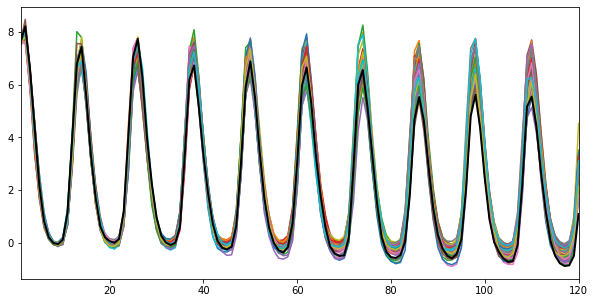

In [81]:
size = (10,5)
fig,ax = plt.subplots(figsize=size)

for ens in range(40):
    ax.plot(sst_ens_mean['nT'], sst_ens_mean['Weddell'].isel(nStart=0,nEns=ens)-273.15)

ax.plot(sst_ens_mean['nT'], ctrl_nStart01_sst, color='k', linewidth=2)
ax.set(xlim=[1,120]);

# ANOMALY

In [80]:
def compute_ens_anom_from_clim(var, timescale, clim):
    
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = var.upper()+'_ENSEMBLE/'
    
    reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')
    regions = list(reg_masks.data_vars)
    
    ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_so_'+timescale+'_mean.nc')
    ens_anom = ens_mean.copy(deep=True)
        
    for s in range(ens_anom['nStart'].size):
        for e in range(ens_anom['nEns'].size):
            for reg in regions:
                np_mean = ens_mean[reg][s,e]
                
                if var.lower() == 'sst':
                    np_clim = clim[reg].values + 273.15
                else:
                    np_clim = clim[reg].values 
                
                reg_anom = np.zeros(120)
                for m in range(120):
                    reg_anom[m] = np_mean[m] - np_clim[m%12]
                
                ens_anom[reg][s,e] = reg_anom
            
    ## add description
    filename = var.lower()+'_ens_so_'+timescale+'_anom.nc'
    ens_anom.attrs['name'] = filename
    
    ens_anom.to_netcdf(writedir+subdir+filename)
    print(writedir+subdir+filename)

In [142]:
def compute_ens_anom_from_mean(var, timescale, ctrl_mean):
    
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = var.upper()+'_ENSEMBLE/'
    
    reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')
    regions = list(reg_masks.data_vars)
    
    ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_so_'+timescale+'_mean.nc')
    ens_anom = ens_mean.copy(deep=True)
        
    for (s,nS) in zip(ens_anom['nStart'].values, range(ens_anom['nStart'].size)):
        
        start_yr = int(s.split('_')[0][1:]) - 1
        start_mth = start_yr * 12
        if start_mth+120 < 3600:
            start_rng = np.arange(start_mth, start_mth+120, 1)
        else:
            start_rng = np.arange(start_mth, 3600, 1)
        
        for (e,nE) in zip(ens_anom['nEns'].values, range(ens_anom['nEns'].size)):           
            for reg in regions:
                np_mean = ens_mean[reg][nS,nE]
                
                if var.lower() == 'sst':
                    np_ctrl = ctrl_mean[reg].isel(time=start_rng).values + 273.15
                else:
                    np_ctrl = ctrl_mean[reg].isel(time=start_rng).values
                
                if np_ctrl.size < 120:
#                     np_mean = np_mean[0:np_ctrl.size]
                    break
                    
                reg_anom = np_mean - np_ctrl
               
                ens_anom[reg][nS,nE] = reg_anom
            
    ## add description
    filename = var.lower()+'_ens_so_'+timescale+'_anom.nc'
    ens_anom.attrs['name'] = filename
    
    ens_anom.to_netcdf(writedir+subdir+filename)
    print(writedir+subdir+filename)

In [143]:
compute_ens_anom_from_mean('sst', 'monthly', sst_so_monthly_mean)

PermissionError: [Errno 13] Permission denied: b'/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc'

In [115]:
compute_ens_anom_from_mean('sss', 'monthly', sss_so_monthly_clim)

AttributeError: 'DataArray' object has no attribute 'split'

In [116]:
compute_ens_anom_from_mean('mld', 'monthly', mld_so_monthly_clim)

AttributeError: 'DataArray' object has no attribute 'split'

In [84]:
compute_ens_anom_from_mean('NPP', 'monthly', npp_so_monthly_clim)

/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_so_monthly_anom.nc


In [85]:
compute_ens_anom_from_mean('pco2surf', 'monthly', pco2_so_monthly_clim)

/home/bbuchovecky/storage/so_predict_derived/PCO2SURF_ENSEMBLE/pco2surf_ens_so_monthly_anom.nc


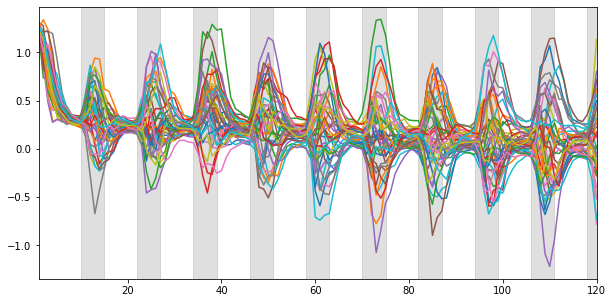

In [117]:
sst_ens_anom = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc')

size = (10,5)
fig,ax = plt.subplots(figsize=size)

for ens in range(40):
    ax.plot(sst_ens_anom['nT'], sst_ens_anom['SouthernOcean'].isel(nStart=0,nEns=ens))

## highlight summer region - when SST variance is greater
for yr in np.arange(10,120,12):
    ax.axvspan(yr, yr+5, alpha=0.25, color='gray')

ax.set(xlim=[1,120]);

In [137]:
np.where(np.arange(50,100,2) == 60)

(array([5]),)